# Prediction of Used Car Prices using Regression Models
### Abdulwahid
### 5/6/2022

## Import Libraries
All libraries are used for specific tasks including data preprocessing, visualization, transformation and evaluation

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor 
import xgboost as xg
import warnings
warnings.filterwarnings("ignore")

## Import Data
### Read Training Data
The training set is read locally and the **head** function is used to display the data for intial understanding

In [2]:
dataTrain=pd.read_csv(r'C:\Users\DELL\Desktop\Predictive Analytics\Rihal_DS_Challenge\data_train.csv')
dataTrain.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,automatic,black,130000,2016,diesel,diesel,1.6,universal,False,owned,front,True,17,38,67,13150.0
1,Renault,manual,brown,149000,2012,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,3,100,7500.0
2,Kia,automatic,brown,110000,2014,gasoline,gasoline,1.6,hatchback,False,owned,front,False,5,10,91,12200.0
3,Opel,automatic,other,255100,2007,gasoline,gasoline,1.8,hatchback,False,owned,front,False,10,4,91,4950.0
4,Mazda,manual,blue,650000,1999,gasoline,gasoline,2.0,sedan,False,owned,front,True,5,7,62,3000.0


The **shape** function displays the number of rows and columns in the training set

In [3]:
dataTrain.shape

(50000, 17)

### Read Testing Data
The testing set is read locally and the **head** function is used to display the data for intial understanding

In [4]:
dataTest=pd.read_csv(r'C:\Users\DELL\Desktop\Predictive Analytics\Rihal_DS_Challenge\data_test.csv')
dataTest.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,BMW,automatic,white,115000,2012,gasoline,gasoline,4.4,sedan,False,owned,all,True,32,104,146,20450.0
1,Mercedes-Benz,manual,other,500000,1999,diesel,diesel,2.2,sedan,False,owned,rear,False,7,9,147,2600.0
2,Fiat,manual,silver,210000,2002,gasoline,gasoline,1.2,hatchback,False,owned,front,True,16,7,27,2900.0
3,Mitsubishi,automatic,violet,294000,2000,diesel,diesel,3.2,suv,False,owned,all,True,10,2,48,7500.0
4,Opel,automatic,blue,244000,1998,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,10,116,2200.0


The **shape** function displays the number of rows and columns in the testing set

In [5]:
dataTest.shape

(27000, 17)

Checking for null values in each column and displaying the sum of all null values in each column (Training Set)

In [6]:
dataTrain.isnull().sum()

manufacturer_name         0
transmission              0
color                     0
odometer_value            0
year_produced             0
engine_fuel               0
engine_type               0
engine_capacity          15
body_type                 0
has_warranty              0
ownership                 0
type_of_drive             0
is_exchangeable           0
number_of_photos          0
number_of_maintenance     0
duration_listed           0
price_usd                 0
dtype: int64

Checking for null values in each column and displaying the sum of all null values in each column (Testing Set)

In [7]:
dataTest.isnull().sum()

manufacturer_name        0
transmission             0
color                    0
odometer_value           0
year_produced            0
engine_fuel              0
engine_type              0
engine_capacity          5
body_type                0
has_warranty             0
ownership                0
type_of_drive            0
is_exchangeable          0
number_of_photos         0
number_of_maintenance    0
duration_listed          0
price_usd                0
dtype: int64

Removing the rows with empty values since the number of empty rows are small. This is the best approach compared to replacing with mean or random values

In [8]:
dataTrain=dataTrain.dropna()
dataTest=dataTest.dropna()

Checking if null values are eliminated (Training set)

In [9]:
dataTrain.isnull().sum()

manufacturer_name        0
transmission             0
color                    0
odometer_value           0
year_produced            0
engine_fuel              0
engine_type              0
engine_capacity          0
body_type                0
has_warranty             0
ownership                0
type_of_drive            0
is_exchangeable          0
number_of_photos         0
number_of_maintenance    0
duration_listed          0
price_usd                0
dtype: int64

In [10]:
dataTrain.shape

(49985, 17)

Checking if null values are eliminated (Testing set)

In [11]:
dataTest.isnull().sum()

manufacturer_name        0
transmission             0
color                    0
odometer_value           0
year_produced            0
engine_fuel              0
engine_type              0
engine_capacity          0
body_type                0
has_warranty             0
ownership                0
type_of_drive            0
is_exchangeable          0
number_of_photos         0
number_of_maintenance    0
duration_listed          0
price_usd                0
dtype: int64

In [12]:
dataTest.shape

(26995, 17)

Checking the data types to see if all the data is in correct format. All the data seems to be in their required format.

In [13]:
dataTrain.dtypes

manufacturer_name         object
transmission              object
color                     object
odometer_value             int64
year_produced              int64
engine_fuel               object
engine_type               object
engine_capacity          float64
body_type                 object
has_warranty                bool
ownership                 object
type_of_drive             object
is_exchangeable             bool
number_of_photos           int64
number_of_maintenance      int64
duration_listed            int64
price_usd                float64
dtype: object

Checking the correlation between the numerical features

In [14]:
dataTrain.corr()

,odometer_value,year_produced,engine_capacity,has_warranty,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
odometer_value,1.000000,-0.491996,0.103935,-0.188735,0.042379,-0.144305,-0.023346,-0.000696,-0.421754
year_produced,-0.491996,1.000000,0.006843,0.207593,-0.058643,0.254744,0.007125,-0.016925,0.704525
engine_capacity,0.103935,0.006843,1.000000,-0.055239,0.076190,0.104773,0.071390,0.074868,0.301269
has_warranty,-0.188735,0.207593,-0.055239,1.000000,0.117561,0.083078,-0.024594,-0.060601,0.277572
is_exchangeable,0.042379,-0.058643,0.076190,0.117561,1.000000,0.099074,0.111587,0.028871,-0.004638
number_of_photos,-0.144305,0.254744,0.104773,0.083078,0.099074,1.000000,0.072288,-0.028092,0.316846
number_of_maintenance,-0.023346,0.007125,0.071390,-0.024594,0.111587,0.072288,1.000000,0.706213,0.058939
duration_listed,-0.000696,-0.016925,0.074868,-0.060601,0.028871,-0.028092,0.706213,1.000000,0.035907
price_usd,-0.421754,0.704525,0.301269,0.277572,-0.004638,0.316846,0.058939,0.035907,1.000000


## EDA (Exploratory Data Analysis)
Visualizations are used to understand the relationship between the target variable and the features. 
The visuals include heatmap, scatterplot,boxplot etc.
### Heat map
The heat map shows that the **year produced** has the highest correlation of 0.7 followed by **engine capacity** and
**number of photos** of about 0.3 correlation.

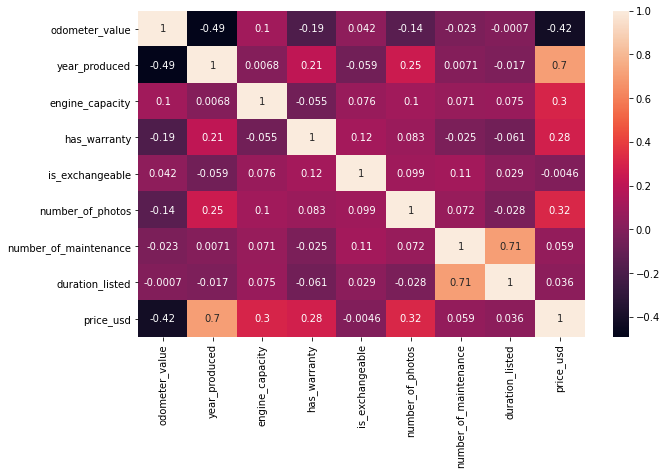

In [15]:
plt.figure(figsize=(10,6))
corr=dataTrain.corr()
sns.heatmap(corr,annot=True)
plt.show()

### Regression Plot
This regression plot show the relation between **odometer** and **price**. A slight negative correlation is observed
this shows that price is being affected by the change in odometer value.

<AxesSubplot:xlabel='odometer_value', ylabel='price_usd'>

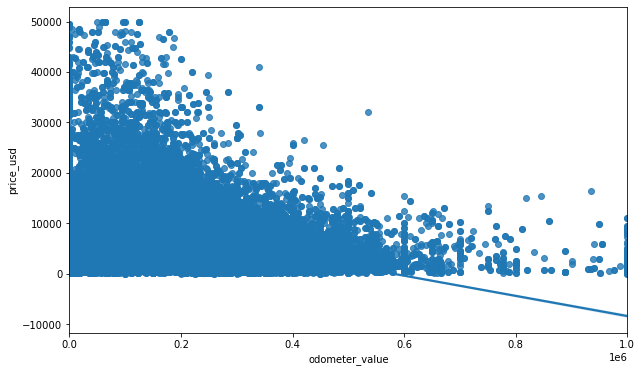

In [16]:
plt.figure(figsize=(10,6))
sns.regplot(x="odometer_value", y="price_usd", data=dataTrain)

As observed in the plot, a **negative correlation** of -0.42 is obtained along with a p-value of 0. The p value confirms that the calculated correlation is **significant** hence this feature is significant to the prediction of used car price.

In [17]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['odometer_value'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.4217541345616377  with a P-value of P = 0.0


The regression plot belowe shows a relationship between the year that the car is produced and the price of the car. A positive 
correlation is observed between the two variables. This shows that the price increases with increase in production year of the car.

<AxesSubplot:xlabel='year_produced', ylabel='price_usd'>

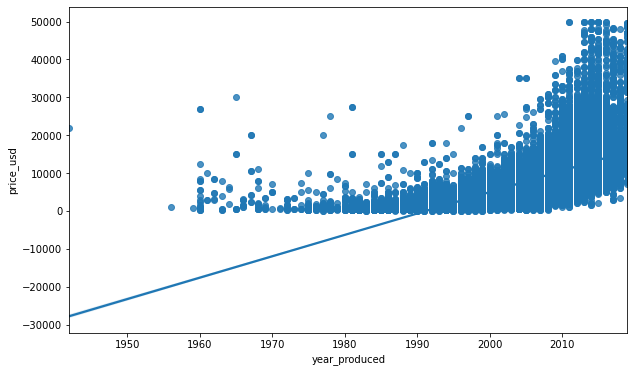

In [18]:
plt.figure(figsize=(10,6))
sns.regplot(x="year_produced", y="price_usd", data=dataTrain)

As observed above, a high positive correlation of 0.7 is calculated along with the p-value of 0. This indicates that the correlation between the variables is significant hence year produced feature can be used for prediction.

In [19]:
pearson_coef, p_value = stats.pearsonr(dataTrain['year_produced'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7045253110212665  with a P-value of P = 0.0


In this plot, a minor correlation is observed between variables. It can only be confirmed with actual correlation which is to be calculated.

<AxesSubplot:xlabel='engine_capacity', ylabel='price_usd'>

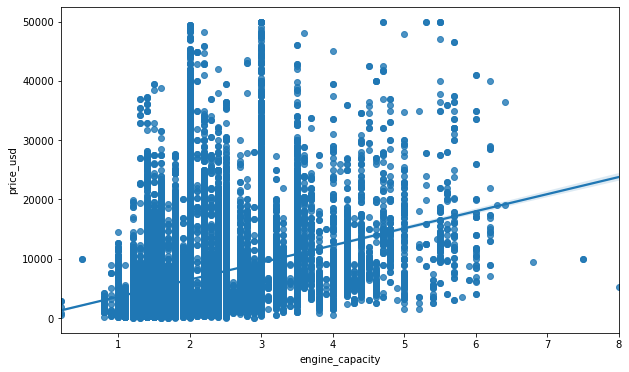

In [20]:
plt.figure(figsize=(10,6))
sns.regplot(x="engine_capacity", y="price_usd", data=dataTrain)

A 0.3 correlation is calculated which is very small with a p value of 0. This indicates that even though the correlation is small but its 30% of 100 which is significant hence this feature can be used for predicition.

In [21]:
pearson_coef, p_value = stats.pearsonr(dataTrain['engine_capacity'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.3012691956320201  with a P-value of P = 0.0


This regression plot shows an minor positive correlation observed with the help of the best fit line. The calculation will confirm the actual value.

<AxesSubplot:xlabel='number_of_photos', ylabel='price_usd'>

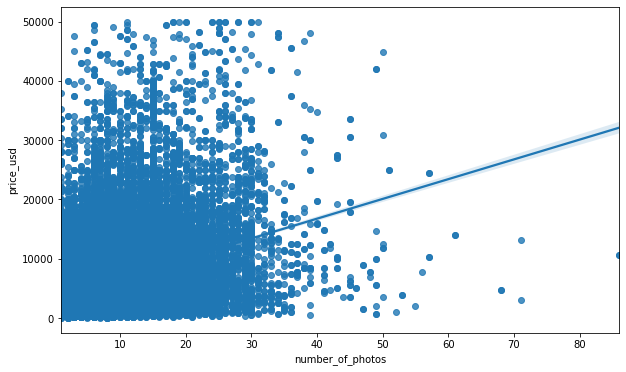

In [22]:
plt.figure(figsize=(10,6))
sns.regplot(x="number_of_photos", y="price_usd", data=dataTrain)

The correlation is 0.31 based on the calculation while the p-value calculated is zero. This is similar to the last feature hence the significant 31% of 100 correlation makes this feature eligble for prediction.

In [23]:
pearson_coef, p_value = stats.pearsonr(dataTrain['number_of_photos'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.316845551688623  with a P-value of P = 0.0


This plot shows no correlation with points all over the graph.

<AxesSubplot:xlabel='number_of_maintenance', ylabel='price_usd'>

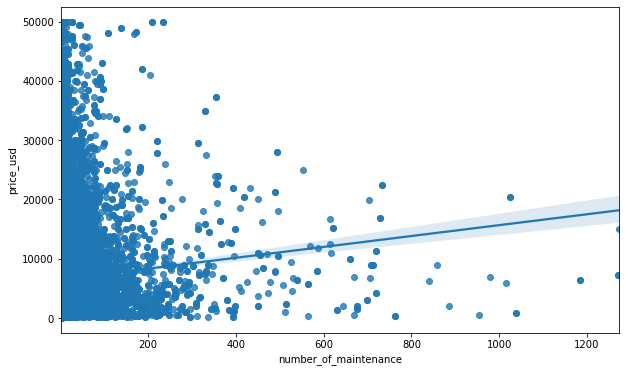

In [24]:
plt.figure(figsize=(10,6))
sns.regplot(x="number_of_maintenance", y="price_usd", data=dataTrain)

The calculation proves that a correlation is lesser than 0.1 percent is same as no correlation and the p-value of lesser than 0.01 confirms it. This feature is not significant enough for predicition

In [25]:
pearson_coef, p_value = stats.pearsonr(dataTrain['number_of_maintenance'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.058939070343314984  with a P-value of P = 1.0242198585534666e-39


Similar to the last plot, this plot shows no correlation with points all over the graph.

<AxesSubplot:xlabel='duration_listed', ylabel='price_usd'>

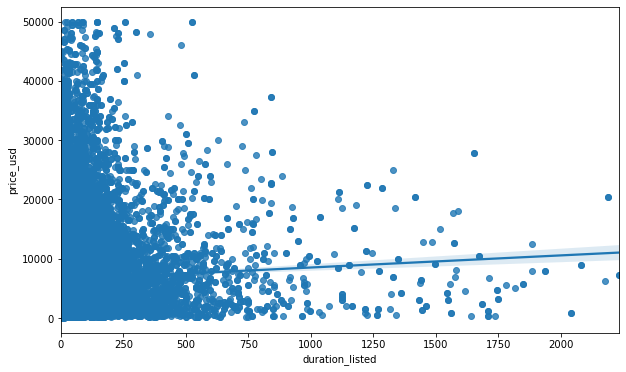

In [26]:
plt.figure(figsize=(10,6))
sns.regplot(x="duration_listed", y="price_usd", data=dataTrain)

The calculated correlation is lesser than 0.1 which is considered negligible. The p-value lesser than 0.01 confirming the correlation value hence this feature is not suitable for prediction of price. 

In [27]:
pearson_coef, p_value = stats.pearsonr(dataTrain['duration_listed'], dataTrain['price_usd'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.035906816108590554  with a P-value of P = 9.732002080958092e-16


### Box Plot
These plots are used for categorical data to determine the importance of features for prediction. 

In the given plot below, it is observed that the price range vary for automatic and manual transmisson. This indicates the categories can vary with price hence feature can be used for prediction

<AxesSubplot:xlabel='transmission', ylabel='price_usd'>

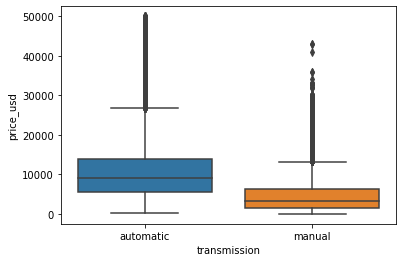

In [28]:
sns.boxplot(x="transmission", y="price_usd", data=dataTrain)

The box plot shows how prices vary based on different colors. This shows that color can be used as a feature for price prediction.

<AxesSubplot:xlabel='color', ylabel='price_usd'>

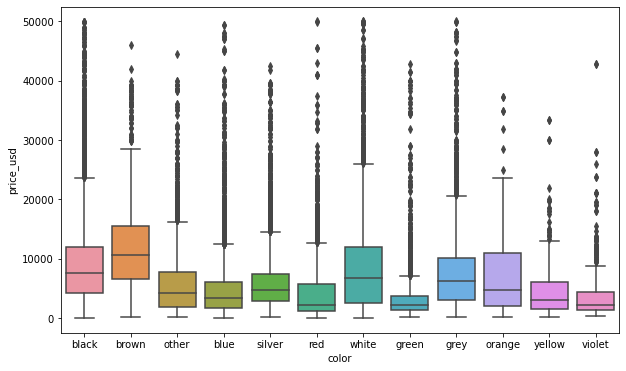

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x="color", y="price_usd", data=dataTrain)

This plot shows engine fuel types and how they affect the price. Hybrid petroll with the highest price range while hybrid diesel with lowest price range. This feature can be used for prediction.

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

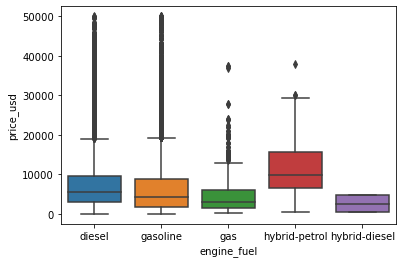

In [30]:
sns.boxplot(x="engine_fuel", y="price_usd", data=dataTrain)

The engine type (based on fuel type) shows that both categories have almost the same price range which will not bring differences in price when prediction is made. Hence this feature is not suitable for price prediction

<AxesSubplot:xlabel='engine_type', ylabel='price_usd'>

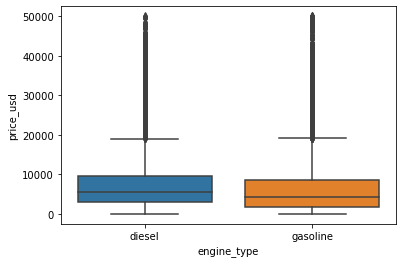

In [31]:
sns.boxplot(x="engine_type", y="price_usd", data=dataTrain)

Thee box plot shows body type categories with varying prices per category hence this feature can be used for price prediction

<AxesSubplot:xlabel='body_type', ylabel='price_usd'>

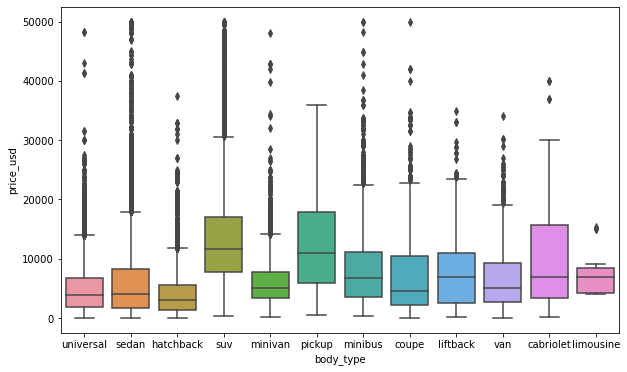

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(x="body_type", y="price_usd", data=dataTrain)

Has warranty feature shows a huge difference in price ranges between cars with warrant and vice versa. This feature is very important for price prediction as the bigger the difference in range the better the feature.

<AxesSubplot:xlabel='has_warranty', ylabel='price_usd'>

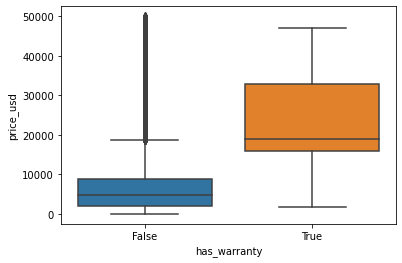

In [33]:
sns.boxplot(x="has_warranty", y="price_usd", data=dataTrain)

This feature is similar to the feature above, all three categories have wider price ranges between one another. This feature is also crucial for price prediction.

<AxesSubplot:xlabel='ownership', ylabel='price_usd'>

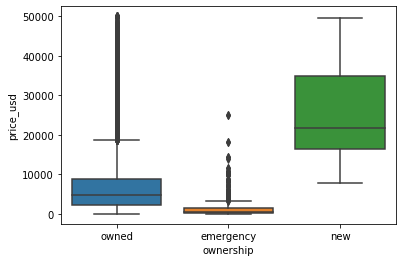

In [34]:
sns.boxplot(x="ownership", y="price_usd", data=dataTrain)

Front and rear drive have **minimal price difference** while all drive shows a **greater difference** hence the feature can be used for prediction.

<AxesSubplot:xlabel='type_of_drive', ylabel='price_usd'>

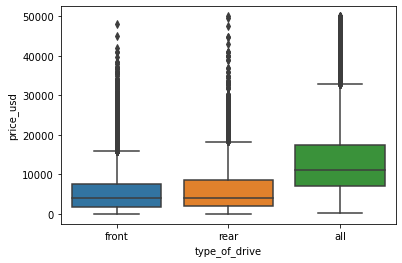

In [35]:
sns.boxplot(x="type_of_drive", y="price_usd", data=dataTrain)

With almost same price range between categories this feature is not suitable for prediction.

<AxesSubplot:xlabel='is_exchangeable', ylabel='price_usd'>

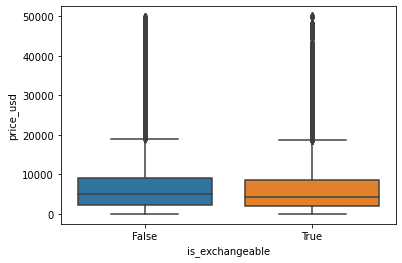

In [36]:
sns.boxplot(x="is_exchangeable", y="price_usd", data=dataTrain)

This plot shows that the manufacturer name is important when selling a car. The variety of price ranges for all categories prove that the feature is significant for price prediction.

<AxesSubplot:xlabel='manufacturer_name', ylabel='price_usd'>

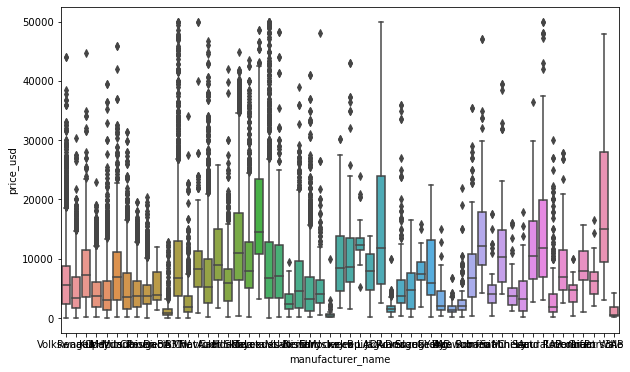

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x="manufacturer_name", y="price_usd", data=dataTrain)

A descriptive analysis to check incorrect entries and anormalies. This is also used to give an overview of the numerical data. It is observed that most of the data has no incorrect entries.

In [38]:
dataTrain.describe()

,odometer_value,year_produced,engine_capacity,number_of_photos,number_of_maintenance,duration_listed,price_usd
count,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000,49985.000000
mean,249275.754426,2002.942143,2.056894,9.660958,16.257417,80.749385,6651.131653
std,136342.510114,8.065809,0.675106,6.144711,41.542444,113.620345,6462.573155
min,0.000000,1942.000000,0.200000,1.000000,1.000000,0.000000,1.000000
25%,158000.000000,1998.000000,1.600000,5.000000,2.000000,23.000000,2100.000000
50%,250000.000000,2003.000000,2.000000,8.000000,5.000000,59.000000,4800.000000
75%,325000.000000,2009.000000,2.300000,12.000000,16.000000,91.000000,8963.290000
max,1000000.000000,2019.000000,8.000000,86.000000,1273.000000,2232.000000,50000.000000


This is a check for categorical data, it is observed that all the data is within the range with no incorrect entries.

In [39]:
dataTrain.describe(include=['object'])

,manufacturer_name,transmission,color,engine_fuel,engine_type,body_type,ownership,type_of_drive
count,49985,49985,49985,49985,49985,49985,49985,49985
unique,55,2,12,5,2,12,3,3
top,Volkswagen,manual,black,gasoline,gasoline,sedan,owned,front
freq,5478,33277,9977,31255,33324,16910,48941,36001


### Data Transformation
Label encoding of categorical features in the training set. Label encoding is converting categorical data into numerical data since the model cant understand textual data.

In [40]:
labelencoder = LabelEncoder()
dataTrain.manufacturer_name = labelencoder.fit_transform(dataTrain.manufacturer_name)
dataTrain.transmission = labelencoder.fit_transform(dataTrain.transmission)
dataTrain.color = labelencoder.fit_transform(dataTrain.color)
dataTrain.engine_fuel = labelencoder.fit_transform(dataTrain.engine_fuel)
dataTrain.engine_type = labelencoder.fit_transform(dataTrain.engine_type)
dataTrain.body_type = labelencoder.fit_transform(dataTrain.body_type)
dataTrain.has_warranty = labelencoder.fit_transform(dataTrain.has_warranty)
dataTrain.ownership = labelencoder.fit_transform(dataTrain.ownership)
dataTrain.type_of_drive = labelencoder.fit_transform(dataTrain.type_of_drive)
dataTrain.is_exchangeable = labelencoder.fit_transform(dataTrain.is_exchangeable)

Label encoding of all categorical data in the testing set.

In [41]:
labelencoder1 = LabelEncoder()
dataTest.manufacturer_name = labelencoder1.fit_transform(dataTest.manufacturer_name)
dataTest.transmission = labelencoder1.fit_transform(dataTest.transmission)
dataTest.color = labelencoder1.fit_transform(dataTest.color)
dataTest.engine_fuel = labelencoder1.fit_transform(dataTest.engine_fuel)
dataTest.engine_type = labelencoder1.fit_transform(dataTest.engine_type)
dataTest.body_type = labelencoder1.fit_transform(dataTest.body_type)
dataTest.has_warranty = labelencoder1.fit_transform(dataTest.has_warranty)
dataTest.ownership = labelencoder1.fit_transform(dataTest.ownership)
dataTest.type_of_drive = labelencoder1.fit_transform(dataTest.type_of_drive)
dataTest.is_exchangeable = labelencoder1.fit_transform(dataTest.is_exchangeable)

In Exploratory data aanalysis, few features were selected because they had no impact on the price prediction. Those features are removed with the functuion below.(Training set)

In [42]:
dataTrain.drop(['number_of_maintenance', 'duration_listed', 'engine_type','is_exchangeable'], axis = 1, inplace = True)

Same features are removed for testing set since the data will be used to train the model

In [43]:
dataTest.drop(['number_of_maintenance', 'duration_listed', 'engine_type','is_exchangeable'], axis = 1, inplace = True)

Checking on the remaining features and if label encoding is applied to all categorical features (Training set).

In [44]:
dataTrain.head(10)

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,body_type,has_warranty,ownership,type_of_drive,number_of_photos,price_usd
0,48,0,0,130000,2016,0,1.6,10,0,2,1,17,13150.0
1,39,1,2,149000,2012,2,1.6,8,0,2,1,9,7500.0
2,23,0,2,110000,2014,2,1.6,2,0,2,1,5,12200.0
3,35,0,6,255100,2007,2,1.8,2,0,2,1,10,4950.0
4,30,1,1,650000,1999,2,2.0,8,0,2,1,5,3000.0
5,35,0,8,368632,2000,0,2.2,9,0,2,2,5,3999.0
6,39,1,7,367000,1997,2,1.4,8,0,2,1,6,940.0
7,18,0,10,135000,2012,2,2.0,8,0,2,1,7,11500.0
8,33,0,8,200800,2004,2,2.4,9,0,2,0,16,5850.0
9,9,1,8,300000,1997,2,1.8,2,0,2,1,3,700.0


Check on the remaining features and application of label encoding to all categorical features (Testing set).

In [45]:
dataTest.head(10)

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,body_type,has_warranty,ownership,type_of_drive,number_of_photos,price_usd
0,3,0,10,115000,2012,2,4.4,8,0,2,0,32,20450.00
1,31,1,6,500000,1999,0,2.2,8,0,2,2,7,2600.00
2,13,1,8,210000,2002,2,1.2,2,0,2,1,16,2900.00
3,33,0,9,294000,2000,0,3.2,9,0,2,0,10,7500.00
4,35,0,1,244000,1998,2,1.6,8,0,2,1,9,2200.00
5,47,1,8,330000,2002,2,1.6,6,0,2,1,7,4500.00
6,43,0,3,0,2019,2,1.4,9,1,1,1,15,27412.98
7,13,1,4,233000,1996,2,1.6,2,0,2,1,5,850.00
8,40,1,1,270000,2000,2,1.8,8,0,2,1,9,2300.00
9,48,1,1,1000000,1990,0,1.9,5,0,2,2,3,3000.00


Standard scaling is the process of scaling down the features between the range of 0 and 1. This helps the model make better prediction as it is easy to understand. The scaling is applied to the training and testing set

In [46]:
scaler = StandardScaler()
scaler.fit(dataTrain)
scaler.fit(dataTest)

StandardScaler()

Dividing the data for training and testing accordingly. X takes the all features while Y takes the target variable

In [47]:
x_train=dataTrain.iloc[:,0:11]
y_train=dataTrain.iloc[:,12]
x_test=dataTest.iloc[:,0:11]
y_test=dataTest.iloc[:,12]

## Fit Model
### Multiple Linear Regression
Calling multiple linear regression model and fitting the training set

In [48]:
rg = LinearRegression()
mdl=rg.fit(x_train,y_train)

Making price prediction using the testing set (Fit to MLR)

In [49]:
y_pred1 = rg.predict(x_test)

### MLR Evaluation
Calculating the R-square for MLR model

In [50]:
print('The R-square for Multiple Linear regression is: ', rg.score(x_train,y_train))

The R-square for Multiple Linear regression is:  0.6386994104921391


Calculating the Mean Square Error for MLR model

In [51]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  14324814.092700502


Calculating the Mean Absolute Error for MLR model

In [52]:
mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  2471.0571016675917


### Distribution Plot
Comparison of actual values vs predicted values (Testing set)

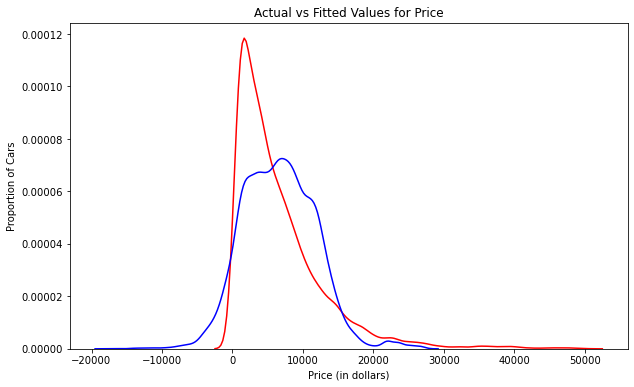

In [53]:
plt.figure(figsize=(10,6))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### Random Forest Regressor (Best Model)
Calling the random forest model and fitting the training data

In [54]:
rf = RandomForestRegressor()
model=rf.fit(x_train,y_train)

Prediction of car prices using the testing data

In [55]:
y_pred2 = rf.predict(x_test)

### Random Forest Evaluation
Calculating the R square value for Random Forest Model (Highest R-square value)

In [56]:
print('The R-square for Random Forest is: ', rf.score(x_train,y_train))

The R-square for Random Forest is:  0.9932720236944996


Calculating the Mean Square Error for Random Forest Model (Lowest MSE value)

In [57]:
mse2 = mean_squared_error(y_test, y_pred2)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  1605669.3475994333


Calculating the Mean Absolute Error for Random Forest Model (Lowest Mean Absolute Error)

In [58]:
mae2= mean_absolute_error(y_test, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  667.7355298134943


### Distribution Plot
Comparison of Actual and Predicted values of price for the testing set

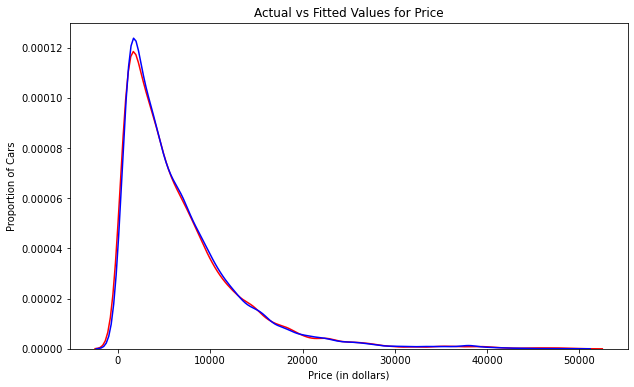

In [59]:
plt.figure(figsize=(10,6))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred2, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### LASSO Model (Better than MLR)
Calling the model and fitting the training data

In [62]:
LassoModel=Lasso()
lm=LassoModel.fit(x_train,y_train)

Price prediction uisng testing data

In [63]:
y_pred3 = lm.predict(x_test)

### LASSO Evaluation
R square value for the LASSO Model

In [65]:
print('The R-square for LASSO is: ', lm.score(x_train,y_train))

The R-square for LASSO is:  0.6386968391282734


Mean Absolute Error for LASSO Model

In [66]:
mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  2471.180694230687


Mean Squared Error for the LASSO Model

In [67]:
mse3 = mean_squared_error(y_test, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  14326356.126645243


### Distribution Plot
Comparison of actual and predicted prices using testing data (Slight better than MLR)

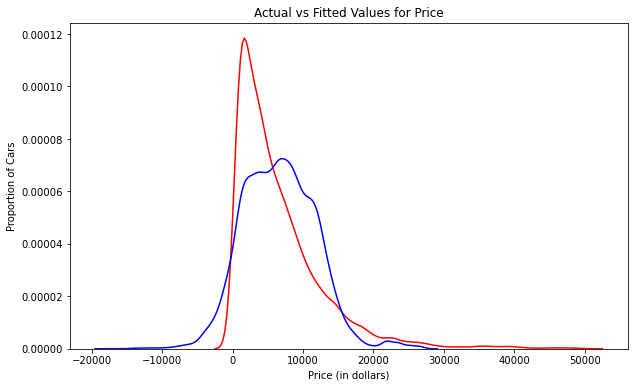

In [68]:
plt.figure(figsize=(10,6))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred3, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

### XGBoost Regressor (> LASSO & MLR)
Calling the model and fitting the training data

In [69]:
xgb_r = xg.XGBRegressor()
xgb_r.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Price prediction using the testing data

In [70]:
y_pred4 = xgb_r.predict(x_test)

### XGBoost Evaluation
Calculating the Mean Absolute Error for XGBoost Model

In [71]:
mae4= mean_absolute_error(y_test, y_pred4)
print('The mean absolute error for XGBoost Model is: ', mae4)

The mean absolute error for XGBoost Model is:  966.3760404667113


Calculating the Mean Squared Error for XGBoost Model

In [72]:
mse4 = mean_squared_error(y_test, y_pred4)
print('The mean square error forXGBoost Model is: ', mse4)

The mean square error forXGBoost Model is:  2363091.5267047402


Calculating the R-square for XGBoost Model

In [73]:
print('The R-square for XGBoost is: ', xgb_r.score(x_train,y_train))

The R-square for XGBoost is:  0.9580889784507913


### Distribution Plot
Comparison of actual and predicted price using testing data (Better than Multiple Linear Regression and LASSO)

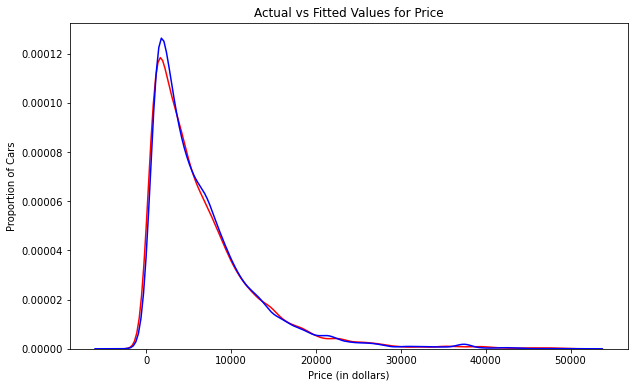

In [74]:
plt.figure(figsize=(10,6))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred4, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [75]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3),
          ('XGBoost', mae4)
         ]

In [76]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,2471.057102
1,Random Forest,667.735530
2,LASSO,2471.180694
3,XGBoost,966.376040


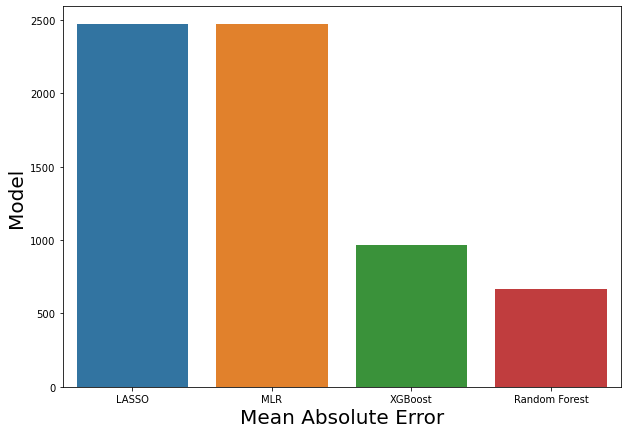

In [80]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Mean Absolute Error', size=20)
axe.set_ylabel('Model', size=20)

plt.show()